# Week 5 : Ant Colony Optimization (ACO)
```
- [S24] Nature Inspired Computing, Innopolis University
- Instructor: Dr Muhammad Fahim
- Teaching Assistants: Gcinizwe Dlamini & Ahmed Taha
```
<hr>


```
Lab Plan
1. Recap (PSO)
2. Recap (Ant Colony Optimization)
3. Ant Colony Optimization Simple implementation
4. Ant Colony Optimization with SKO
5. Self-Study
```

<hr>


## 1. Recap : Particle swarm optimization

![](https://www.researchgate.net/publication/333314611/figure/fig2/AS:761735870939136@1558623392061/The-Particle-Swarm-Optimization-PSO-algorithm.png)

## 2. Ant Colony Optimization (ACO)
Ant Colony Optimization (ACO) is a metaheuristic algorithm that is inspired by the behavior of ants in search of food. ACO has been successfully applied to various optimization problems, including the traveling salesman problem, vehicle routing problem, and graph coloring problem.


Pheromone update:

![Delta tau](https://wikimedia.org/api/rest_v1/media/math/render/svg/da75f512c94f2b2737112bebbf97539f5f6928c0)

![Tau update](https://wikimedia.org/api/rest_v1/media/math/render/svg/62ef8b59ad37970b4e693ee923b6d7db8bbd5c30)

Transition probability:

![P(x->y)](https://wikimedia.org/api/rest_v1/media/math/render/svg/a55af3e02c1e319b5b8be2c626e6cf851e8078f9)

Applications:
- https://en.wikipedia.org/wiki/Ant_colony_optimization_algorithms#Applications
- https://www.math.md/files/csjm/v23-n3/v23-n3-(pp343-359).pdf

based on [link](https://scikit-opt.github.io/scikit-opt/#/en/README?id=_5-aca-ant-colony-algorithm-for-tsp)


## 3. ACO Simple implementation

### 3.1 Travelling salesman problem
Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city exactly once and returns to the origin city?
* All cities are visited once
* Returns to the starting city
* Cheapest round trip

In [ ]:
!pip install sko

In [ ]:
import numpy as np
from scipy import spatial

In [ ]:
import numpy as np

class AntColony:
    def __init__(self, distances, n_ants, n_iterations, decay, alpha=1, beta=1):
        """
        Initialize the Ant Colony Optimization algorithm.

        Parameters:
        - distances: A 2D numpy array where distances[i][j] represents the distance between cities i and j.
        - n_ants: The number of ants used in the algorithm.
        - n_iterations: The number of iterations to run the algorithm.
        - decay: The rate at which pheromone trails evaporate over time. need more explination
        - alpha: The influence of pheromone strength on the probability of selecting the next city.
        - beta: The influence of heuristic value (inverse of distance) on the probability of selecting the next city.
        """
        self.distances = distances
        self.pheromones = np.ones(distances.shape) / len(distances)
        self.n_ants = n_ants
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta

    def run(self):
        """
        Run the ACO algorithm to find the shortest path for the TSP.

        Returns:
        - shortest_path: The shortest path found by the algorithm.
        - shortest_distance: The distance of the shortest path.
        """
        shortest_path = None
        shortest_distance = float('inf')
        for i in range(self.n_iterations):
            paths = self._construct_solutions()
            distances = [self._path_distance(path) for path in paths]
            # YOUR CODE HERE
            # Update pheromones based on paths and distances
            self._update_pheromones(paths, distances)
            best_idx = np.argmin(distances)
            if distances[best_idx] < shortest_distance:
              shortest_distance = distances[best_idx]
              shortest_path = paths[best_idx]
              self.pheromones *= self.decay
        return shortest_path, shortest_distance


    def _construct_solutions(self):
        """
        Construct solutions for each ant in the colony.

        Returns:
        - paths: A list of paths, one for each ant.
        """
        paths = [self._construct_path() for i in range(self.n_ants)]

        # YOUR CODE HERE
        # Construct path for each ant

        return paths

    def _construct_path(self):
        """
        Construct a path for an ant based on pheromone trails and distances.

        Returns:
        - path: The constructed path.
        """
        path = [0]  # Start from city 0
        remaining = set(range(1, self.distances.shape[0]))
        while remaining:
          next_node = self._select_next(path[-1], remaining)
          path.append(next_node)
          remaining.remove(next_node)

        return path

    def _select_next(self, current, remaining):
        """
        Select the next city to visit based on pheromone trails and heuristic.

        Parameters:
        - current: The current city.
        - remaining: The set of cities that have not yet been visited.

        Returns:
        - The next city to visit, randomly choosing with respect to the probabilities (probs)
        """
        choices = list(remaining)
        probabilities = [(self.pheromones[current][j]**self.alpha) * (self._distance_heuristic(current, j)**self.beta) for j in choices]
        probabilities /= np.sum(probabilities )
        # YOUR CODE HERE
        # Calculate the probability of moving to each city in choices

        return np.random.choice(choices, p = probabilities)

    def _distance_heuristic(self, i, j):
        """
        Calculate the heuristic value for moving from city i to city j.

        Parameters:
        - i: The current city.
        - j: The next city.

        Returns:
        - The heuristic value for moving from city i to city j.
        """
        # YOUR CODE HERE
        # Define the heuristic value based on the distance
        # HINT: UES RECIPROCAL TO THE DISTANCE

        return 1 / self.distances[i][j]

    def _path_distance(self, path):
        """
        Calculate the total distance of a given path.

        Parameters:
        - path: The path of cities.

        Returns:
        - The total distance of the path.
        """
        return sum([self.distances[path[i]][path[i+1]] for i in range(len(path)-1)])

    def _update_pheromones(self, paths, distances):
        """
        Update the pheromones on the paths based on the distances of the paths.

        Parameters:
        - paths: The paths taken by the ants.
        - distances: The distances of these paths.
        """
        for i in range(self.distances.shape[0]):
            for j in range(self.distances.shape[1]):
                for path, distance in zip(paths, distances):
                    # YOUR CODE HERE
                    # Check if city j follows city i in the path and update pheromones (For both directions)
                    index_of_i = np.where(np.array(paths) == i)[0]
                    if index_of_i.size > 0:
                      index_of_i = index_of_i[0]
                    if index_of_i + 1 < len(path) and path[index_of_i + 1] == j:
                      self.pheromones[i][j] = 1 / distance
                      self.pheromones[j][i] = self.pheromones[i][j]


### 3.2 Testing ACO simple solution

In [ ]:
import numpy as np

np.random.seed(42)

num_cities = 6

random_distances = np.random.randint(1, 10, size = (num_cities, num_cities))

# Make the matrix symmetric to ensure distance[i][j] = distance[j][i]
distances = (random_distances + random_distances.T) // 2

# Make the diagonal elements 0 (distance from a city to itself)
np.fill_diagonal(distances, 0)

print("Distance Matrix:")
print(distances)


# The number of ants used in the algorithm. Each ant will independently try to construct a solution.
n_ants = 10
# The number of times the set of ants will try to solve the TSP
n_iterations = 100
# The rate at which pheromone trails evaporate over time.
decay = 0.5

aco = AntColony(distances, n_ants, n_iterations, decay)
shortest_path, shortest_distance = aco.run()

print("\nShortest path:", shortest_path)
print("Shortest distance:", shortest_distance)

Distance Matrix:
[[0 5 5 3 5 3]
 [5 0 5 4 7 7]
 [5 5 0 1 6 5]
 [3 4 1 0 9 5]
 [5 7 6 9 0 6]
 [3 7 5 5 6 0]]

Shortest path: [0, 5, 2, 3, 1, 4]
Shortest distance: 20


## 4. ACO from sko

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.animation import FuncAnimation
from sko.ACA import ACA_TSP

In [ ]:
num_points = 30

np.int = np.int32
np.float = np.float64
np.bool = np.bool_


points_coordinate = np.random.rand(num_points, 2)  # generate coordinate of points
distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')

def cal_total_distance(routine):
    num_points=routine.shape[0]
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])

# np.int = int # new virsion deprecation of np.int
aca = ACA_TSP(func=cal_total_distance, n_dim=num_points,
              size_pop=num_points, max_iter=100,
              distance_matrix=distance_matrix)

best_x, best_y = aca.run()
print(f'{best_x = }, {best_y = }')

best_x = array([ 0,  4,  8,  7, 11,  6, 19, 14,  2,  3,  5, 21,  1, 15, 26, 13, 17,
       20, 24, 29, 27, 18, 16, 10, 22, 12, 25, 28, 23,  9], dtype=int32), best_y = 4.8425081315514555


### 4.1 Visualizing the Results

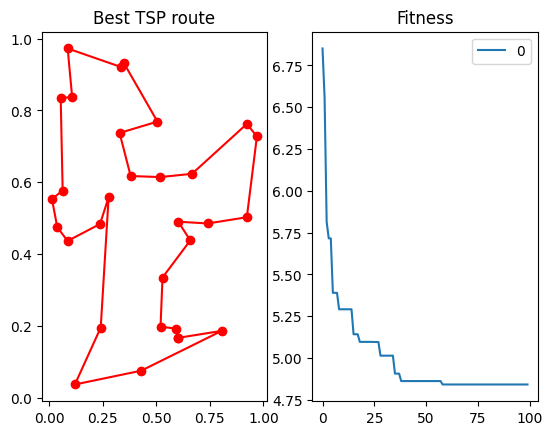

In [ ]:
fig, ax = plt.subplots(1, 2)
best_points_ = np.concatenate([best_x, [best_x[0]]])
best_points_coordinate = points_coordinate[best_points_, :]
ax[0].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1], 'o-r')
ax[0].set_title('Best TSP route')

pd.DataFrame(aca.y_best_history).cummin().plot(ax=ax[1])
ax[1].set_title('Fitness')
plt.show()

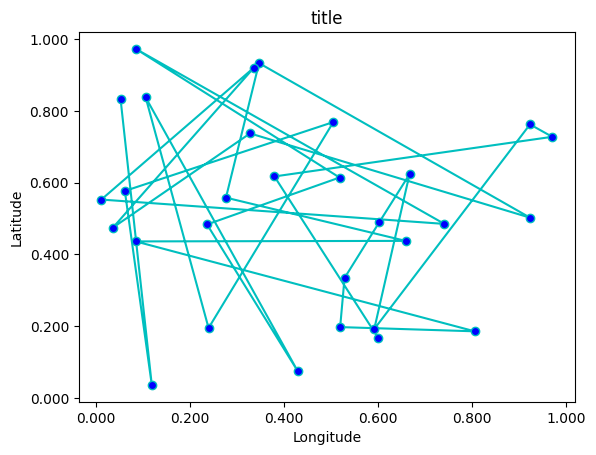

In [ ]:
best_x_history, best_y_history = aca.x_best_history, aca.y_best_history

indexes = np.array(best_y_history).argsort()
best_x_history = np.array(best_x_history)[indexes]

fig2, ax2 = plt.subplots(1, 1)
ax2.set_title('title', loc='center')
line = ax2.plot(points_coordinate[:, 0], points_coordinate[:, 1],
                marker='o', markerfacecolor='b', color='c', linestyle='-')
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax2.set_xlabel("Longitude")
ax2.set_ylabel("Latitude")
plt.ion()
p = plt.show()


def update_scatter(frame):
    if frame == len(best_x_history):
        ax2.set_title('Best TSP route')
        best_points_ = np.concatenate([best_x, [best_x[0]]])
        best_points_coordinate = points_coordinate[best_points_, :]
        plt.setp(line, 'xdata', best_points_coordinate[:, 0], 'ydata', best_points_coordinate[:, 1])
        return line
    ax2.set_title('iter = ' + str(frame))
    points = best_x_history[frame]
    points = np.concatenate([points, [points[0]]])
    point_coordinate = points_coordinate[points, :]
    plt.setp(line, 'xdata', point_coordinate[:, 0], 'ydata', point_coordinate[:, 1])

    return line


ani = FuncAnimation(
    fig2,
    update_scatter,
    blit=False,
    repeat=False,
    interval=50,
    frames=len(best_x_history) + 1
)

plt.show()

For continuous function optimization check
[This link](opthttps://mealpy.readthedocs.io/en/latest/pages/models/mealpy.swarm_based.html#module-mealpy.swarm_based.ACOR)